In [1]:
import types
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_bf71b2aaab5e4141bd379fd5c105495e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='DbzVzBO1JUrFmC0Ny7stDkosHtEEg1wITZLKZAfSKpF2',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_bf71b2aaab5e4141bd379fd5c105495e.get_object(Bucket='dataclassificationanalysisbadge-donotdelete-pr-vktdjo854s0ifo',Key='diabetes.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

Diabetes = pd.read_csv(body)
Diabetes.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,pos
1,1,85,66,29,0,26.6,0.351,31,neg
2,8,183,64,0,0,23.3,0.672,32,pos
3,1,89,66,23,94,28.1,0.167,21,neg
4,0,137,40,35,168,43.1,2.288,33,pos


In [2]:
Diabetes.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Diabetes                    False
dtype: bool

In [3]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
Diabetes['Diabetes'] = labelencoder_y.fit_transform(Diabetes['Diabetes'])

In [4]:
Diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


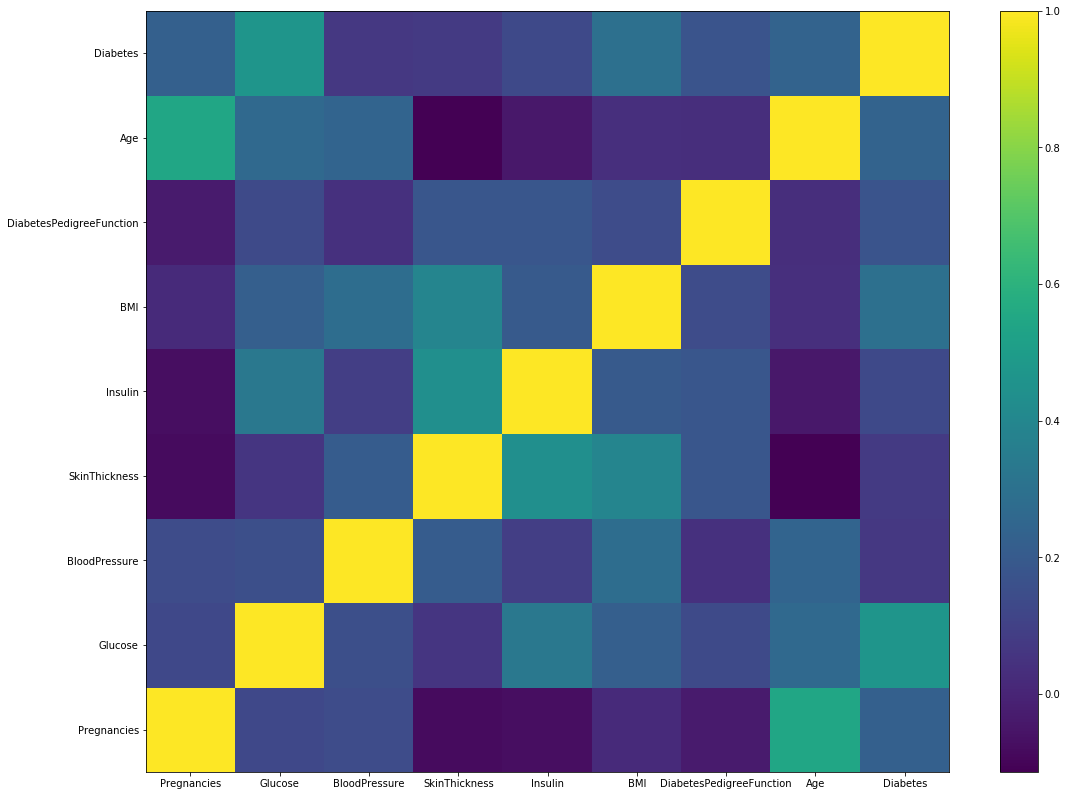

In [5]:
fig = plt.figure(figsize=(18, 14))
corr = Diabetes.corr()
c = plt.pcolor(corr)
plt.yticks(np.arange(0.5, len(corr.index), 1), corr.index)
plt.xticks(np.arange(0.5, len(corr.columns), 1), corr.columns)
fig.colorbar(c)

In [7]:
from sklearn.model_selection import train_test_split
X = Diabetes.iloc[:, :-1].values
y=  Diabetes.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,random_state= 0) 

In [8]:
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
X_train = sc1.fit_transform(X_train)
X_test = sc1.transform(X_test)

In [9]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [10]:
y_predict=classifier.predict(X_test)
y_predict

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [11]:
y_predict1 = classifier.predict([[6,48,72,35,0,33.6,0.627,50]])
y_predict1

array([1])

In [12]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test,y_predict)
ac

0.8246753246753247

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
cm

array([[98,  9],
       [18, 29]])

In [14]:
import sklearn.metrics as metrics
fpr, tpr, threashhold =  metrics.roc_curve(y_test,y_predict)

In [15]:
roc_auc=metrics.auc(fpr,tpr)
roc_auc

0.7664545635315172

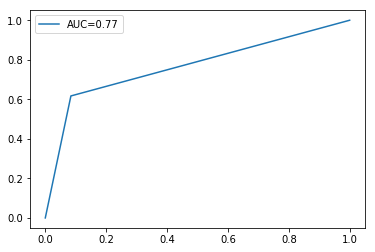

In [16]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc)
plt.legend()
plt.show()